# Balance of plant

In [1]:
using Revise
using FUSE
using Plots;
FUSE.logging(Logging.Info; actors=Logging.Debug);

[ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]


WebIO._IJuliaInit()

### Initialize FPP v1_demount case
[FPP v1 demount case documentation](https://fuse.help/cases.html#FPP)

In [2]:
ini, act = FUSE.case_parameters(:FPP; version=:v1_demount, init_from=:scalars);
dd = FUSE.init(ini, act; do_plot=false);

[ Info: FUSE.ActorEquilibrium @ step
[ Info: FUSE.ActorSolovev @ step
[ Info: FUSE.ActorCXbuild @ step
[ Info: FUSE.ActorSteadyStateCurrent @ step
[ Info: FUSE.ActorECsimple @ step


### Run Actors that will be needed for balance of plant

In [3]:
FUSE.ActorNeutronics(dd, act; do_plot=false)
FUSE.ActorDivertors(dd, act)
FUSE.ActorBlanket(dd, act);

[ Info: FUSE.ActorNeutronics{Float64} @ step
[ Info: FUSE.ActorDivertors @ step
[ Info: FUSE.ActorBlanket @ step
[ Info: FUSE.ActorCXbuild @ step


### Running the simple brayton cycle
Run the balance of plant actor, with for the simple case of "brayton only", this is a generalized power cycle which does not optimize itself depending on the configuration

[ Info: FUSE.ActorHeatTransfer @ step
[ Info: FUSE.ActorThermalCycle @ step
[ Info: FUSE.ActorBalanceOfPlant @ step


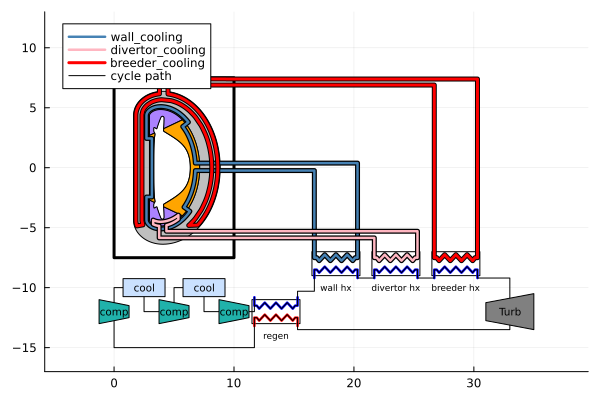

balance_of_plant
├─ Q_plant ➡ [0.5652]
├─ heat_transfer
│  ├─ breeder
│  │  ├─ HX_outlet_temperature ➡ [823.15] [K]
│  │  ├─ circulator_power ➡ [253886] [W]
│  │  ├─ flow_rate ➡ [6549.33] [kg/s]
│  │  ├─ heat_delivered ➡ [5.00478e+08] [W]
│  │  ├─ heat_load ➡ [6.66279e+08] [W]
│  │  ├─ heat_waste ➡ [1.66055e+08] [W]
│  │  ├─ inlet_temperature ➡ [823.213] [K]
│  │  ├─ outlet_temperature ➡ [1373.15] [K]
│  │  └─ working_fluid ➡ "Pbli"
│  ├─ divertor
│  │  ├─ HX_outlet_temperature ➡ [843.453] [K]
│  │  ├─ circulator_power ➡ [1.72002e+07] [W]
│  │  ├─ flow_rate ➡ [285.141] [kg/s]
│  │  ├─ heat_delivered ➡ [1.1974e+08] [W]
│  │  ├─ heat_load ➡ [1.008e+08] [W]
│  │  ├─ heat_waste ➡ [-1.73985e+06] [W]
│  │  ├─ inlet_temperature ➡ [855.07] [K]
│  │  ├─ outlet_temperature ➡ [923.15] [K]
│  │  └─ working_fluid ➡ "He"
│  └─ wall
│     ├─ HX_outlet_temperature ➡ [602.826] [K]
│     ├─ circulator_power ➡ [1.22932e+07] [W]
│     ├─ flow_rate ➡ [285.141] [kg/s]
│     ├─ heat_delivered ➡ [0] [W]
│    

In [20]:
empty!(dd.balance_of_plant)
act.ActorThermalCycle.power_cycle_type=:brayton_only
FUSE.ActorBalanceOfPlant(dd, act; do_plot=true)
display(IMAS.freeze(dd.balance_of_plant))

### Running the complex_brayton file
[ActorBalanceOfPlant documentation](https://fuse.help/actors.html#BalanceOfPlant)
Run the balance of plant with the model "complex_brayton". This configuration modifies the component order and operating temperatures to minimize the heat waste. For this case, the complex_brayton model has a thermal effeciency of 45%. 
This model relies on high operating temperatures

[ Info: FUSE.ActorHeatTransfer @ step
[ Info: FUSE.ActorThermalCycle @ step
[ Info: FUSE.ActorBalanceOfPlant @ step


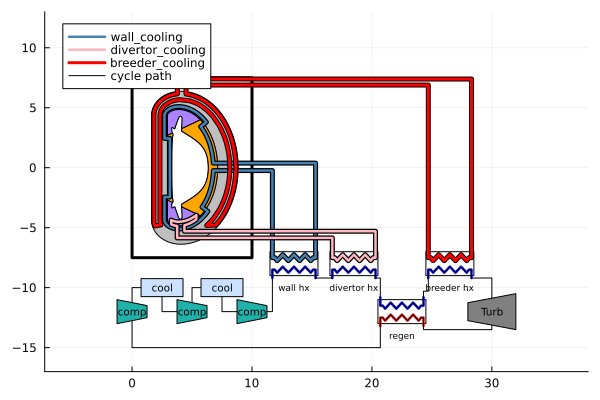

balance_of_plant
├─ Q_plant ➡ [1.67149]
├─ heat_transfer
│  ├─ breeder
│  │  ├─ HX_outlet_temperature ➡ [842.059] [K]
│  │  ├─ circulator_power ➡ [253886] [W]
│  │  ├─ excess_temperature ➡ [70.5747] [K]
│  │  ├─ flow_rate ➡ [6549.33] [kg/s]
│  │  ├─ heat_delivered ➡ [5.88211e+08] [W]
│  │  ├─ heat_load ➡ [6.66279e+08] [W]
│  │  ├─ heat_waste ➡ [7.82999e+07] [W]
│  │  ├─ inlet_temperature ➡ [771.547] [K]
│  │  ├─ outlet_temperature ➡ [1373.34] [K]
│  │  └─ working_fluid ➡ "Pbli"
│  ├─ divertor
│  │  ├─ HX_outlet_temperature ➡ [488.277] [K]
│  │  ├─ circulator_power ➡ [1.11879e+07] [W]
│  │  ├─ flow_rate ➡ [285.141] [kg/s]
│  │  ├─ heat_delivered ➡ [1.10757e+08] [W]
│  │  ├─ heat_load ➡ [1.008e+08] [W]
│  │  ├─ heat_waste ➡ [1.23067e+06] [W]
│  │  ├─ inlet_temperature ➡ [495.002] [K]
│  │  ├─ outlet_temperature ➡ [563.082] [K]
│  │  └─ working_fluid ➡ "He"
│  └─ wall
│     ├─ HX_outlet_temperature ➡ [375.791] [K]
│     ├─ circulator_power ➡ [8.6105e+06] [W]
│     ├─ flow_rate ➡ [285.141]

In [19]:
empty!(dd.balance_of_plant)
act.ActorThermalCycle.power_cycle_type=:complex_brayton
FUSE.ActorBalanceOfPlant(dd, act; do_plot = true);
display(IMAS.freeze(dd.balance_of_plant))